In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('vectorized_data.zip')

In [3]:
df.shape

(176141, 53)

In [4]:
df['Assessment reports Score'].value_counts()

3    91941
4    61151
2    21104
1     1451
5      494
Name: Assessment reports Score, dtype: int64

In [5]:
df.Course

0         AH111
1         AH111
2         AH111
3         AH111
4         AH111
          ...  
176136    NS162
176137    NS162
176138    NS162
176139    NS162
176140    NS162
Name: Course, Length: 176141, dtype: object

In [6]:
df.columns

Index(['Polls ID', 'Poll Responses Response', 'Assessment reports Hashtag',
       'Assessment reports Score', 'time_stamp', 'tokenized_responses',
       'stemmed_responses', 'clean_responses', 'string', 'LOs/ HCs', 'College',
       'Course', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula',
       'lex_data_prep', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 'vec',
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20'],
      dtype='object')

In [7]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']

In [8]:
len(X.columns)

40

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [10]:
#parameters for class imbalance
scale_pos_weight = {0: 8, 1: 6, 2: 1, 3:4, 4:8}


classifier = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3,
    scale_pos_weight = scale_pos_weight
    
)

In [11]:
classifier.fit(X_train, y_train)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:18:12] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:18:12] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight={0: 8, 1: 6, 2: 1, 3: 4, 4: 8}, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
feature_tables = pd.DataFrame(classifier.feature_importances_.reshape(1, -1), columns=X.columns).T
feature_tables.sort_values(by=0, ascending=False)

,0
unique_words,0.125563
linsear_write_formula,0.120501
automated_readability_index,0.104876
words_count,0.077135
ttr,0.038144
time_stamp,0.037230
coleman_liau_index,0.034465
flesch_kincaid_grade,0.033120
mtld,0.030083
rttr,0.024077


In [13]:
y_pred = classifier.predict(X_test)

In [14]:
mean_squared_error(y_test, y_pred)

0.5251612317195022

In [15]:
import collections, numpy
counter = collections.Counter(y_pred)
counter

Counter({3: 36107, 4: 7627, 2: 302})

In [16]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.33%


In [17]:
train_score = classification_report(y_test, y_pred)
print(train_score)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       365
           2       0.34      0.02      0.04      5380
           3       0.56      0.88      0.68     22932
           4       0.55      0.27      0.37     15231
           5       0.00      0.00      0.00       128

    accuracy                           0.55     44036
   macro avg       0.29      0.23      0.22     44036
weighted avg       0.52      0.55      0.49     44036



/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Cross validation

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X, y, cv=kf)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:18:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:18:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:19:23] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:19:24] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:20:02] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:20:02] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:20:37] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:20:37] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:21:12] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:21:12] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.558
Fold 2: 0.554
Fold 3: 0.554
Fold 4: 0.552
Fold 5: 0.557
Overall Accuracy: 0.555 (+/- 0.004)


## PCA

### Apply feature scaling 

In [20]:
# copying the data
X_copy = X.copy()
columns = X_copy.columns

In [21]:
# Apply feature scaling 
scaler = StandardScaler()
X_copy = scaler.fit_transform(X_copy)
X_copy = pd.DataFrame(X_copy, columns= columns)
X_copy.head()

,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,hdd,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
0,-1.593275,1.837151,-1.906500,-2.287811,0.0,-1.007697,0.998781,0.060848,-1.891338,0.689165,...,1.464224,0.959246,-0.098361,0.280757,2.477449,0.353728,1.024375,0.607406,0.671660,-0.742308
1,-1.593275,2.240929,-2.073847,-1.871686,0.0,-1.699033,-0.904536,-0.512376,-1.688607,-0.196419,...,0.702232,-0.923810,0.088845,-1.087795,1.166284,-1.335129,-0.059469,0.852506,0.555800,0.356221
2,-1.593275,0.918881,-1.425377,-1.940347,0.0,-1.106459,0.769070,-0.337392,-1.621030,-0.218795,...,1.203156,0.927328,1.254317,0.082801,1.357561,-0.733246,1.060611,2.153163,1.522558,1.224065
3,-1.593275,1.763342,-2.241195,-1.890412,0.0,-1.962399,-0.126801,-0.663225,-1.958914,0.613917,...,1.020900,-0.336535,-0.044004,-0.663575,0.612370,-1.755211,-0.011937,-0.418215,1.517592,0.040702
4,-1.593275,2.461271,-2.408542,-2.142167,0.0,-1.945938,-0.888128,-1.960522,-1.823761,0.769570,...,0.497952,0.322494,-0.507367,-1.375359,-0.623143,-2.149296,0.529687,-1.647904,0.620126,-0.625186


Text(0.5, 1.0, 'PCA cumulative explained variance')

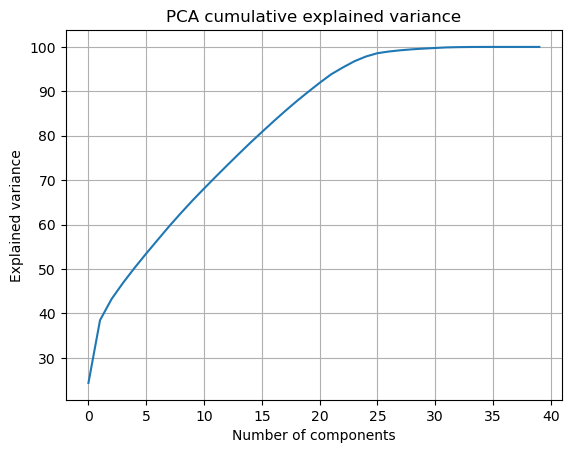

In [22]:
import numpy as np
from sklearn.decomposition import PCA
# Use 100 components to see explained variance 
pca_40 = PCA(n_components = 40)
pca_40.fit(X_copy)

plt.grid()
plt.plot(np.cumsum(pca_40.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')

In [23]:
#Explained variance ratio with numbers of components

import pandas as pd
explained_var = np.cumsum(pca_40.explained_variance_ratio_ * 100).reshape(-1, 1)
num_comps = [i+1 for i in range(40)]
explained_var
explained_var_df = pd.DataFrame(explained_var,index=num_comps, columns = ['Explained Variance Ratio'])
explained_var_df

,Explained Variance Ratio
1,24.359500
2,38.465465
3,43.243804
4,46.918157
5,50.292981
6,53.498780
7,56.597218
8,59.679065
9,62.604601
10,65.429363


In [24]:
def pca_results(full_dataset, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    
    #use the number of componenets to create dimensions 
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # use PCA components to create a dataframe: columns = variables, rows = component values
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.columns)
    components.index = dimensions#change index to dimensions 
    
    # PCA explained variance 
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    #make explained variance into a column format
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    return pd.concat([variance_ratios, components], axis = 1) #put explained variance and component df together 


def pca_plot(pca_results_df , nth_component):
    
    explain_variance = pca_results_df['Explained Variance'][:nth_component]
    accu_explain_variance = np.round(explain_variance.sum(),4)

    
    sort_comp = pca_results_df.iloc[nth_component-1, 1:].sort_values()
    head = sort_comp[:5]  #largest five variables in a component
    tail = sort_comp[-5:] #smallest five variables in a component
    components = pd.concat([head, tail])
    
    # Plot the components 
    components.plot(kind='bar', title='Component ' + str(nth_component), color = 'c')
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)

    plt.show()
    print('Accumulative explained varaince for Component',nth_component,'is',accu_explain_variance)
    return components

In [25]:
pca_results_40 = pca_results(X, pca_40)
pca_results_40

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2436,-0.0293,0.2198,-0.2352,-0.2342,-0.0000,-0.2440,-0.1652,-0.1965,-0.2206,...,0.0297,-0.0322,0.0011,0.0301,-0.0102,-0.0366,0.0375,0.0419,-0.0913,0.0235
Dimension 2,0.1411,0.1164,-0.1944,0.2767,0.2648,-0.0000,0.2602,0.0001,-0.0770,0.2908,...,-0.0171,-0.0126,-0.0150,0.0121,-0.0128,0.0229,-0.0240,0.0046,-0.0161,0.0102
Dimension 3,0.0478,-0.0429,-0.3261,0.0843,0.0094,0.0000,0.0529,0.4711,0.3348,-0.0132,...,-0.0990,0.3485,0.0082,0.1197,0.0690,0.0682,-0.1612,-0.0943,0.0085,-0.1952
Dimension 4,0.0367,-0.0400,-0.0190,-0.0041,-0.0046,0.0000,0.0086,0.0766,-0.0347,0.0011,...,0.2147,0.1620,-0.3911,-0.2915,0.0607,-0.2494,0.0711,-0.1841,0.2385,-0.0573
Dimension 5,0.0337,0.0609,0.0155,-0.0103,-0.0109,-0.0000,-0.0081,-0.0148,0.0421,-0.0142,...,-0.1062,0.1022,-0.0138,-0.0399,-0.0997,0.3422,-0.2782,0.0435,0.2433,-0.1375
Dimension 6,0.0321,0.3554,-0.0306,0.0000,-0.0192,-0.0000,-0.0187,0.0129,0.0984,-0.0257,...,-0.0854,0.0134,0.1560,0.0376,0.0994,0.3784,0.0760,0.3351,0.1934,0.0069
Dimension 7,0.0310,-0.0948,0.0356,-0.0403,-0.0441,-0.0000,0.0067,0.0988,-0.1028,-0.0353,...,0.2140,0.1447,-0.0466,-0.2125,0.5947,-0.0080,0.0797,-0.0906,0.3398,0.1678
Dimension 8,0.0308,-0.0332,0.0241,-0.0023,-0.0041,0.0000,0.0117,-0.0116,0.0658,-0.0018,...,-0.2501,0.2438,0.2581,-0.1472,-0.2424,-0.1546,0.1948,-0.3837,-0.1811,0.1430
Dimension 9,0.0293,-0.1363,0.0094,-0.0114,-0.0200,-0.0000,-0.0060,0.0101,0.0077,-0.0129,...,-0.1870,0.2082,0.1028,-0.1602,0.1046,-0.1164,-0.0641,0.3465,0.0969,0.3246
Dimension 10,0.0282,0.1337,0.0619,0.0044,0.0452,-0.0000,-0.0151,-0.1838,0.0404,0.0380,...,-0.3116,-0.2711,-0.0352,0.1300,0.5112,-0.2401,-0.1673,-0.0342,-0.0569,-0.4512


In [26]:
pca_results_40.iloc[0]

Explained Variance              0.2436
time_stamp                     -0.0293
flesch_reading_ease             0.2198
flesch_kincaid_grade           -0.2352
gunning_fog                    -0.2342
smog_index                     -0.0000
automated_readability_index    -0.2440
coleman_liau_index             -0.1652
dale_chall_readability_score   -0.1965
linsear_write_formula          -0.2206
hdd                            -0.2663
Summer                         -0.2315
Dugast                         -0.1653
words_count                    -0.1832
unique_words                   -0.2716
ttr                            -0.1439
rttr                           -0.3067
cttr                           -0.3067
mtld                           -0.2456
herdan                         -0.2081
maas                            0.2464
vec_1                           0.0424
vec_2                           0.0015
vec_3                           0.0301
vec_4                          -0.0313
vec_5                    

In [27]:
#Reapply PCA with 25 components
pca_25 = PCA(25)
pca_features_25 = pca_25.fit_transform(X_copy)

In [28]:
print(pca_features_25.shape)
print(np.cumsum(pca_25.explained_variance_ratio_))

(176141, 25)
[0.243595   0.38465465 0.43243804 0.46918157 0.50292981 0.5349878
 0.56597218 0.59679065 0.62604601 0.65429363 0.68119472 0.70758783
 0.73351052 0.75905003 0.78416903 0.8083782  0.83220257 0.85537851
 0.8776243  0.89874025 0.91921573 0.93848967 0.95369249 0.9677027
 0.9784156 ]


Text(0.5, 1.0, 'PCA cumulative explained variance')

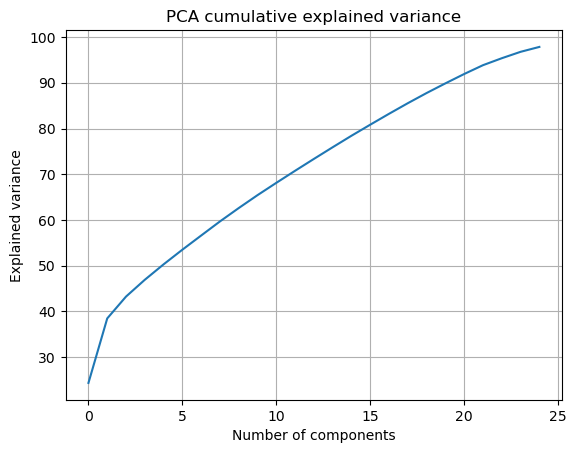

In [29]:
plt.grid()
plt.plot(np.cumsum(pca_25.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')


In [30]:
pca_features_25

array([[ 0.4532939 , -5.7209447 ,  0.22006193, ..., -0.11586098,
         0.01282386, -0.26368552],
       [ 2.68689308, -3.75935417, -1.47402212, ..., -0.22906365,
        -0.7209716 ,  0.63221899],
       [ 3.55201458, -2.95920862,  1.14647649, ..., -1.02483685,
        -0.1524723 , -0.01205443],
       ...,
       [ 2.30026386, -4.22412275,  1.16862095, ..., -0.45315123,
        -0.35854324,  0.13259876],
       [ 2.58110394,  1.73821864, -2.044149  , ...,  0.14346212,
        -0.65788013, -0.06885593],
       [-2.00741716, -0.68177162, -1.21611734, ..., -0.47344488,
         0.11214975,  0.45970969]])

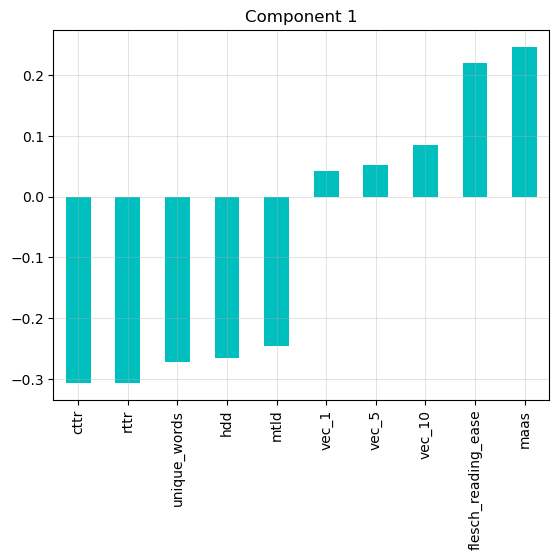

Accumulative explained varaince for Component 1 is 0.2436


cttr                  -0.3067
rttr                  -0.3067
unique_words          -0.2716
hdd                   -0.2663
mtld                  -0.2456
vec_1                  0.0424
vec_5                  0.0519
vec_10                 0.0848
flesch_reading_ease    0.2198
maas                   0.2464
Name: Dimension 1, dtype: float64

In [31]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25
pca_plot(pca_results_25, 1)

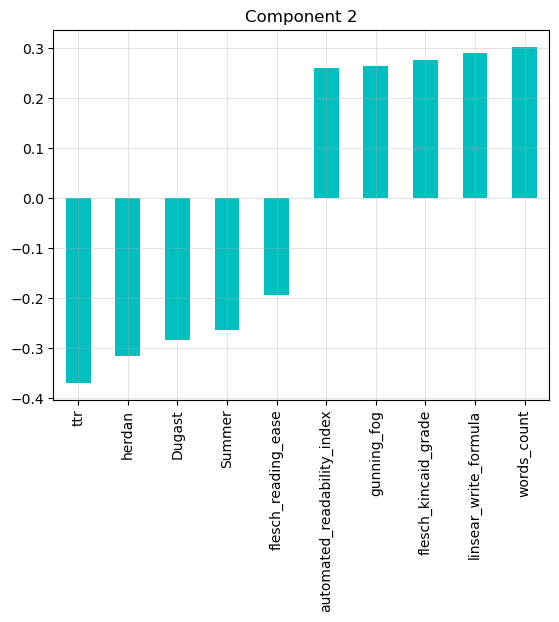

Accumulative explained varaince for Component 2 is 0.3847


ttr                           -0.3696
herdan                        -0.3160
Dugast                        -0.2834
Summer                        -0.2639
flesch_reading_ease           -0.1944
automated_readability_index    0.2602
gunning_fog                    0.2648
flesch_kincaid_grade           0.2767
linsear_write_formula          0.2908
words_count                    0.3030
Name: Dimension 2, dtype: float64

In [32]:
pca_plot(pca_results_25, 2)

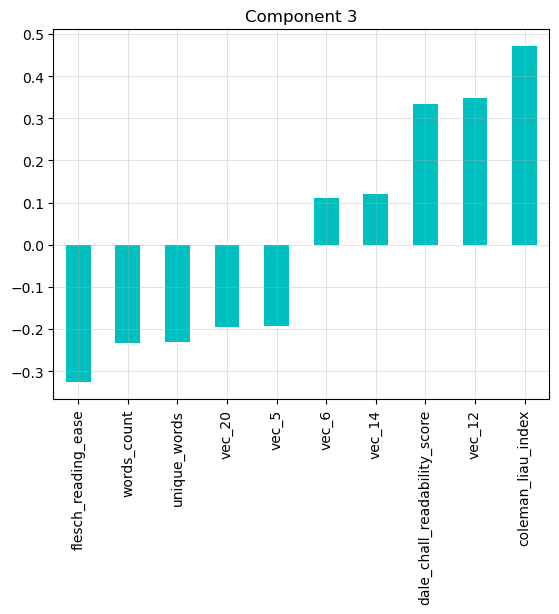

Accumulative explained varaince for Component 3 is 0.4325


flesch_reading_ease            -0.3261
words_count                    -0.2322
unique_words                   -0.2310
vec_20                         -0.1952
vec_5                          -0.1922
vec_6                           0.1119
vec_14                          0.1197
dale_chall_readability_score    0.3348
vec_12                          0.3485
coleman_liau_index              0.4711
Name: Dimension 3, dtype: float64

In [33]:
pca_plot(pca_results_25, 3)

In [34]:
#train test split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(pca_features_25, y, test_size=0.20, random_state=123)

In [35]:
classifier_pca = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

classifier_pca.fit(X_train_pca, Y_train_pca)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred_pca = classifier_pca.predict(X_test_pca)

counter = collections.Counter(y_pred_pca)
counter

Counter({3: 30016, 4: 5063, 2: 150})

In [37]:
# predictions_pca = [round(value) for value in y_pred_pca]

In [38]:
# evaluate predictions
accuracy = accuracy_score(Y_test_pca, y_pred_pca)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.25%


In [39]:
train_score = classification_report(Y_test_pca, y_pred_pca)
print(train_score)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       283
           2       0.29      0.01      0.02      4305
           3       0.54      0.89      0.67     18302
           4       0.49      0.20      0.29     12231
           5       0.00      0.00      0.00       108

    accuracy                           0.53     35229
   macro avg       0.27      0.22      0.20     35229
weighted avg       0.49      0.53      0.45     35229



/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [40]:
mean_squared_error(Y_test_pca, y_pred_pca)

0.5440688069488205

## Cross validation

In [41]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier_pca, pca_features_25, y, cv=kf)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:25] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:03] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:35] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.538
Fold 2: 0.534
Fold 3: 0.536
Fold 4: 0.533
Fold 5: 0.539
Overall Accuracy: 0.536 (+/- 0.004)


In [43]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2436,-0.0293,0.2198,-0.2352,-0.2342,0.0,-0.2440,-0.1652,-0.1965,-0.2206,...,0.0297,-0.0322,0.0011,0.0301,-0.0102,-0.0366,0.0375,0.0419,-0.0913,0.0235
Dimension 2,0.1411,0.1164,-0.1944,0.2767,0.2648,-0.0,0.2602,0.0001,-0.0770,0.2908,...,-0.0171,-0.0126,-0.0150,0.0121,-0.0128,0.0229,-0.0240,0.0046,-0.0161,0.0102
Dimension 3,0.0478,-0.0429,-0.3261,0.0843,0.0094,0.0,0.0529,0.4711,0.3348,-0.0132,...,-0.0990,0.3485,0.0082,0.1197,0.0690,0.0682,-0.1612,-0.0943,0.0085,-0.1952
Dimension 4,0.0367,-0.0400,-0.0190,-0.0041,-0.0046,0.0,0.0086,0.0766,-0.0347,0.0011,...,0.2147,0.1620,-0.3911,-0.2915,0.0607,-0.2494,0.0711,-0.1841,0.2385,-0.0573
Dimension 5,0.0337,0.0609,0.0155,-0.0103,-0.0109,-0.0,-0.0081,-0.0148,0.0421,-0.0142,...,-0.1062,0.1022,-0.0138,-0.0399,-0.0997,0.3422,-0.2782,0.0435,0.2433,-0.1375
Dimension 6,0.0321,0.3554,-0.0306,0.0000,-0.0192,-0.0,-0.0187,0.0129,0.0984,-0.0257,...,-0.0854,0.0134,0.1560,0.0376,0.0994,0.3784,0.0760,0.3351,0.1934,0.0069
Dimension 7,0.0310,-0.0948,0.0356,-0.0403,-0.0441,0.0,0.0067,0.0988,-0.1028,-0.0353,...,0.2140,0.1447,-0.0466,-0.2125,0.5947,-0.0080,0.0797,-0.0906,0.3398,0.1678
Dimension 8,0.0308,-0.0332,0.0241,-0.0023,-0.0041,-0.0,0.0117,-0.0116,0.0658,-0.0018,...,-0.2501,0.2438,0.2581,-0.1472,-0.2424,-0.1546,0.1948,-0.3837,-0.1811,0.1430
Dimension 9,0.0293,-0.1363,0.0094,-0.0114,-0.0200,-0.0,-0.0060,0.0101,0.0077,-0.0129,...,-0.1870,0.2082,0.1028,-0.1602,0.1046,-0.1164,-0.0641,0.3465,0.0969,0.3246
Dimension 10,0.0282,0.1337,0.0619,0.0044,0.0452,-0.0,-0.0151,-0.1838,0.0404,0.0380,...,-0.3116,-0.2711,-0.0352,0.1300,0.5112,-0.2401,-0.1673,-0.0342,-0.0569,-0.4512
